(379, 13) (379,)
loss = 306.535431
loss = 108.215354
loss = 54.247134
loss = 38.640906
loss = 33.400624
loss = 31.084140
loss = 29.680009
loss = 28.621503
loss = 27.733082
loss = 26.949868
loss = 26.241511
loss = 25.590542
loss = 24.985538
loss = 24.418535
loss = 23.883787
loss = 23.377062
loss = 22.895175
loss = 22.435685
loss = 21.996674
loss = 21.576601
loss = 21.174199
loss = 20.788395
loss = 20.418264
loss = 20.062993
loss = 19.721849
loss = 19.394167
loss = 19.079333
loss = 18.776779
loss = 18.485969
loss = 18.206401
loss = 17.937598
loss = 17.679109
loss = 17.430505
loss = 17.191375
loss = 16.961330
loss = 16.739995
loss = 16.527015
loss = 16.322049
loss = 16.124769
loss = 15.934864
loss = 15.752035
loss = 15.575994
loss = 15.406469
loss = 15.243197
loss = 15.085925
loss = 14.934414
loss = 14.788431
loss = 14.647756
loss = 14.512178
loss = 14.381492
loss = 14.255504
loss = 14.134028
loss = 14.016885
loss = 13.903904
loss = 13.794919
loss = 13.689775
loss = 13.588319
loss = 13.49

loss = 9.903212
loss = 9.902825
loss = 9.902440
loss = 9.902057
loss = 9.901677
loss = 9.901299
loss = 9.900923
loss = 9.900549
loss = 9.900178
loss = 9.899808
[-9.38501146  1.73035793 -4.65678217 -1.86657919  2.32528401 -7.92909165
 -0.19495226  9.31935626 -3.59115311  1.11421123 -0.94681163  1.88395808
 -6.83012265]
[ 9.16193818]


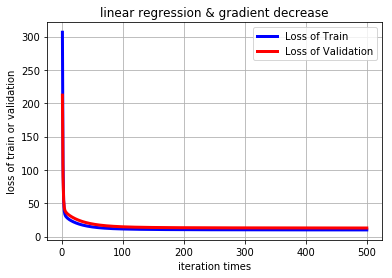

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

def loadDataSet():
	# 读取数据
	X,y=load_svmlight_file("housing_scale.txt")
	#将稀疏矩阵转化为完整特征矩阵
	X.todense()
	# 将数据集切分为训练集和验证集
	X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=0)
	print(X_train.shape,y_train.shape)
	return X_train, X_validation, y_train, y_validation

def gradDescent(alpha,maxCycles,X_data,y_data):
	num = y_data.shape[0]    #样本数量
	# 线性模型参数正态分布初始化
	w = np.random.normal(size=(X_data.shape[1]))
	b = np.random.normal(size=1)
	losss = []

	#迭代次maxCycles次
	for n in range(maxCycles):
		grad_w = np.zeros(X_data.shape[1])
		grad_b = np.zeros(1)
		loss = 0
		for i in range(num):
			y = np.dot( X_data[i].data, w ) + b
			loss += np.power((y - y_data[i]),2) / ( 2 * num)
			grad_w += ( y - y_data[i] ) * X_data[i].data / num
			grad_b += ( y - y_data[i] ) / num
		#更新模型参数
		w -= alpha * grad_w 
		b -= alpha * grad_b
		losss.append(loss)
		print("loss = %f" % loss)
	print(w)
	print(b)
	return losss

def plotLossPerTime(n,losss_train,losss_validation):
	plt.xlabel('iteration times')
	plt.ylabel('loss of train or validation')
	plt.title('linear regression & gradient decrease')
	n_cycles = range(1,n+1)
	plt.plot(n_cycles, losss_train, label = "Loss of Train", color='blue', linewidth=3)
	plt.plot(n_cycles, losss_validation, label = "Loss of Validation", color='red', linewidth=3)
	plt.legend(loc=0)
	plt.grid()
	plt.show()

# main
X_train, X_validation, y_train, y_validation = loadDataSet()
alpha = 0.1
maxCycles = 500
losss_train = gradDescent(alpha,maxCycles,X_train,y_train)
#losss_validation = gradDescent(alpha,maxCycles,X_validation,y_validation)
plotLossPerTime(maxCycles,losss_train,losss_validation)